## Interacting with the Alpha Vantage API using Python libraries

As automation and algorithms continue to disrupt the investment managment business, it is important to know how to access finacial data that is realtime and interactive. We will learn how to access the Alpha Vantage API to build datasets of recent stock performance. Alpha Vantage is a provider of free APIs for realtime and historical data on stocks, forex, and cryptocurrencies.

This part of the exercise demonstrates:

1. Setting up a programming environment to work with APIs
2. Interpreting documentation to change parameters
3. Using the 'requests' library to make HTTP requests
4. Getting data through HTTP requests
5. Using the 'alpha_vantage' library to access the API and format the data
6. Creating an Excel file from the data

Documentation links:
<br />Alpha Vantage: https://www.alphavantage.co/documentation/
<br />Alpha Vantage Python library: https://alpha-vantage.readthedocs.io/en/latest/#
<br />Requests library: https://2.python-requests.org/en/master/
<br />Pandas DataFrame: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

______

#### Import libraries

Import the appropriate libraries in the lines below each comment:

In [3]:
# pandas
import pandas as pd
# requests
import requests
# alpha_vantage TimeSeries class
from alpha_vantage.timeseries import TimeSeries
# mmatplotlib.pyplot as plt
import matplotlib.pyplot as plt

#### Get API key

Go to https://www.alphavantage.co/support/#api-key and obtain an API key. Copy this key into the "api_key" variable in the next cell:

In [5]:
api_key = "RYRX3H9RBEZZYN42"

Assign a stock ticker symbol of your choosing to the 'ticker' variable:

In [6]:
ticker = "KO"

#### Access API through an HTTP request

Assign the API url to the variable "link".
<br />(refer to the Alpha Vantage documention)
<br />
<br />Format the url string to include the "api_key" variable and the "ticker" variable.

In [10]:
link = f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=[ticker]&interval=5min&apikey=[api_key
]"
print(link)


https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=KO&interval=5min&apikey=RYRX3H9RBEZZYN42


Refer to the requests documentation to set up a get request to the above url. Assign the output to a new variable, preferably your ticket symbol. 

In [11]:
KO = requests.get(link)

Print the HTTP response:

In [15]:
KO.status_code
print(KO)
KO.text
print(KO.text)

<Response [200]>
{
    "Meta Data": {
        "1. Information": "Intraday (5min) open, high, low, close prices and volume",
        "2. Symbol": "KO",
        "3. Last Refreshed": "2020-09-04 20:00:00",
        "4. Interval": "5min",
        "5. Output Size": "Compact",
        "6. Time Zone": "US/Eastern"
    },
    "Time Series (5min)": {
        "2020-09-04 20:00:00": {
            "1. open": "51.3000",
            "2. high": "51.3500",
            "3. low": "51.3000",
            "4. close": "51.3500",
            "5. volume": "3110"
        },
        "2020-09-04 19:55:00": {
            "1. open": "51.2200",
            "2. high": "51.4700",
            "3. low": "51.0000",
            "4. close": "51.2500",
            "5. volume": "10580"
        },
        "2020-09-04 19:50:00": {
            "1. open": "51.0100",
            "2. high": "51.0100",
            "3. low": "51.0100",
            "4. close": "51.0100",
            "5. volume": "500"
        },
        "2020-09-04 1

Print the data:

In [18]:
KO.json()

{'Meta Data': {'1. Information': 'Intraday (5min) open, high, low, close prices and volume',
  '2. Symbol': 'KO',
  '3. Last Refreshed': '2020-09-04 20:00:00',
  '4. Interval': '5min',
  '5. Output Size': 'Compact',
  '6. Time Zone': 'US/Eastern'},
 'Time Series (5min)': {'2020-09-04 20:00:00': {'1. open': '51.3000',
   '2. high': '51.3500',
   '3. low': '51.3000',
   '4. close': '51.3500',
   '5. volume': '3110'},
  '2020-09-04 19:55:00': {'1. open': '51.2200',
   '2. high': '51.4700',
   '3. low': '51.0000',
   '4. close': '51.2500',
   '5. volume': '10580'},
  '2020-09-04 19:50:00': {'1. open': '51.0100',
   '2. high': '51.0100',
   '3. low': '51.0100',
   '4. close': '51.0100',
   '5. volume': '500'},
  '2020-09-04 19:40:00': {'1. open': '51.0000',
   '2. high': '51.0000',
   '3. low': '51.0000',
   '4. close': '51.0000',
   '5. volume': '105'},
  '2020-09-04 19:20:00': {'1. open': '51.1000',
   '2. high': '51.1000',
   '3. low': '51.0100',
   '4. close': '51.0100',
   '5. volume':

______

#### Access the API through the alpha_vantage libray

Create an instance of the TimeSeries class imported earlier. Assign your API key to the key argument. Use "pandas" as an output format.

In [19]:
ts = TimeSeries(key='api_key', output_format='pandas')

In [20]:
type(ts)

alpha_vantage.timeseries.TimeSeries

In [21]:
type(1)

int

Use the get_intraday method to access API data. Get the last 100 observations of data for your ticker symbol at 1-minute intervals:

In [22]:
data, meta_data = ts.get_intraday(symbol=ticker, interval='1min', outputsize='compact')

Print the data:

In [23]:
print(data)

                     1. open  2. high   3. low  4. close  5. volume
date                                                               
2020-09-04 19:57:00  51.3000   51.350  51.3000   51.3500     3110.0
2020-09-04 19:55:00  51.2500   51.250  51.2500   51.2500      400.0
2020-09-04 19:54:00  51.2200   51.470  51.0000   51.0000    10180.0
2020-09-04 19:50:00  51.0100   51.010  51.0100   51.0100      500.0
2020-09-04 19:38:00  51.0000   51.000  51.0000   51.0000      105.0
...                      ...      ...      ...       ...        ...
2020-09-04 14:45:00  51.1609   51.165  51.1450   51.1600    17727.0
2020-09-04 14:44:00  51.2150   51.215  51.1601   51.1700    18729.0
2020-09-04 14:43:00  51.2150   51.250  51.2100   51.2118    28656.0
2020-09-04 14:42:00  51.2100   51.220  51.1850   51.2150    23780.0
2020-09-04 14:41:00  51.1700   51.235  51.1600   51.2100    93491.0

[100 rows x 5 columns]


In [26]:
print(meta_data)

{'1. Information': 'Intraday (1min) open, high, low, close prices and volume', '2. Symbol': 'KO', '3. Last Refreshed': '2020-09-04 19:57:00', '4. Interval': '1min', '5. Output Size': 'Compact', '6. Time Zone': 'US/Eastern'}


In [27]:
type(data)

pandas.core.frame.DataFrame

Plot one column of the time series data with the ticket symbol as the title of the graph.
<br />(refer to prior problem set examples)

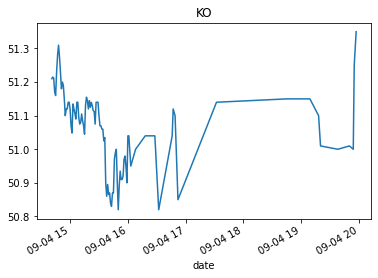

In [28]:
data['4. close'].plot()
plt.title(ticker)
plt.show()

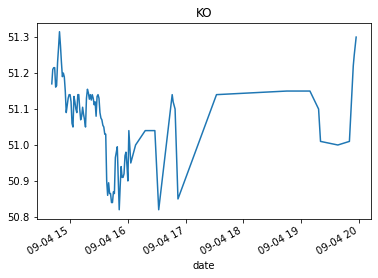

In [30]:
data['1. open'].plot()
plt.title(ticker)
plt.show()

#### Export intraday data to Excel file

Refer to the pandas.DataFrame documentation and create an Excel file that includes your time series data of your stock price:

In [32]:
data.to_excel('my_Coca-Cola_data.xlsx')